In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


In [5]:
# Build CNN Model
model = keras.Sequential([
    # First Convolutional Block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model Architecture:")
model.summary()

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 110ms/step - accuracy: 0.7457 - loss: 0.7773 - val_accuracy: 0.9788 - val_loss: 0.0659
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 102ms/step - accuracy: 0.9621 - loss: 0.1301 - val_accuracy: 0.9862 - val_loss: 0.0436
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9757 - loss: 0.0885 - val_accuracy: 0.9891 - val_loss: 0.0326
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.9804 - loss: 0.0698 - val_accuracy: 0.9907 - val_loss: 0.0316
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9844 - loss: 0.0555 - val_accuracy: 0.9917 - val_loss: 0.0270
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9875 - loss: 0.0445 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.9880 - loss: 0.0407 - val_accuracy: 0.9915 - val_loss: 0.0319
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9902 - loss: 0.0334 

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9906


In [9]:
# Visualize predictions on 5 sample images
def visualize_predictions(model, x_test, y_test, num_samples=5):
    # Get random samples
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    # Make predictions
    predictions = model.predict(x_test[indices])
    predicted_classes = np.argmax(predictions, axis=1)

    # Plot
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i, idx in enumerate(indices):
        axes[i].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {y_test[idx]}, Pred: {predicted_classes[i]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


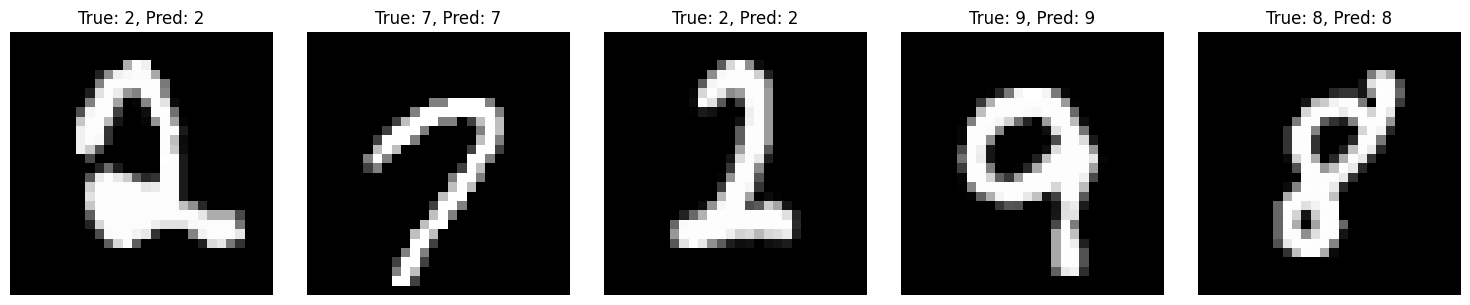

In [10]:
# Visualize predictions
visualize_predictions(model, x_test, y_test)

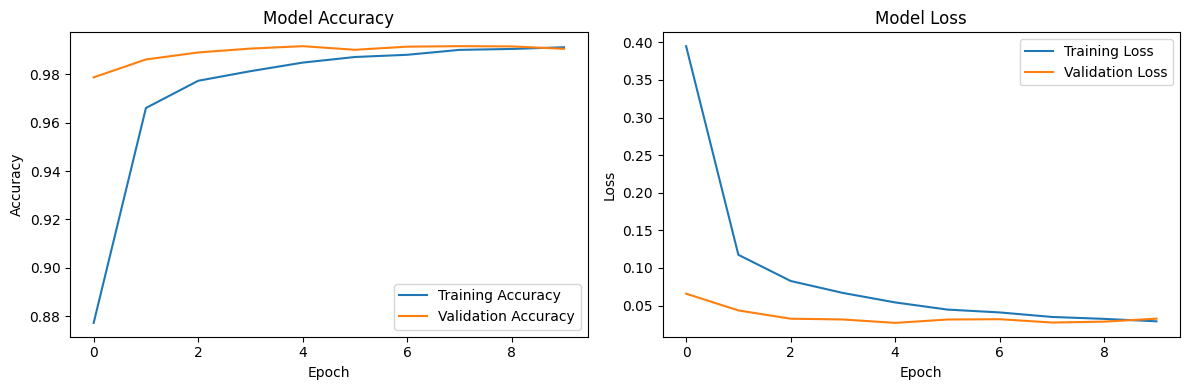

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
